In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r '/content/drive/Shareddrives/ML/MLP/train.zip' .
!cp -r '/content/drive/Shareddrives/ML/MLP/val.zip' .
!cp -r '/content/drive/Shareddrives/ML/MLP/test.zip' .
!unzip train.zip
!unzip val.zip
!unzip test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/Audi S4 Sedan 2007/01772.jpg  
  inflating: test/Audi S4 Sedan 2007/07660.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05574.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05670.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/06535.jpg  
  inflating: test/Audi S4 Sedan 2007/02743.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05098.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05814.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/04907.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/05078.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/02176.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/02831.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/03905.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/04396.jpg  
  inflating: test/Volkswagen Golf Hatchback 2012/04751.jpg  
  inflating: test/Audi S4 Sedan 2007/03217.jpg  
  inflating: test/Vol

In [ ]:
import os
# finally, list new distribution of images in train
train_save_path = 'train'
val_save_path = 'val'
test_save_path = 'test'

aug_train_distribution = {}
for model in os.listdir(train_save_path):
  aug_train_distribution[model] = 0
  for photo in os.listdir(os.path.join(train_save_path, model)):
    aug_train_distribution[model] += 1

aug_train_distribution

{'AM General Hummer SUV 2000': 72,
 'Acura Integra Type R 2001': 72,
 'Acura RL Sedan 2012': 52,
 'Acura TL Sedan 2012': 68,
 'Acura TL Type-S 2008': 68,
 'Acura TSX Sedan 2012': 66,
 'Acura ZDX Hatchback 2012': 62,
 'Aston Martin V8 Vantage Convertible 2012': 72,
 'Aston Martin V8 Vantage Coupe 2012': 66,
 'Aston Martin Virage Convertible 2012': 54,
 'Aston Martin Virage Coupe 2012': 60,
 'Audi 100 Sedan 1994': 66,
 'Audi 100 Wagon 1994': 68,
 'Audi A5 Coupe 2012': 66,
 'Audi R8 Coupe 2012': 68,
 'Audi RS 4 Convertible 2008': 60,
 'Audi S4 Sedan 2007': 72,
 'Audi S4 Sedan 2012': 64,
 'Audi S5 Convertible 2012': 68,
 'Audi S5 Coupe 2012': 68,
 'Audi S6 Sedan 2011': 74,
 'Audi TT Hatchback 2011': 66,
 'Audi TT RS Coupe 2012': 64,
 'Audi TTS Coupe 2012': 68,
 'Audi V8 Sedan 1994': 70,
 'BMW 1 Series Convertible 2012': 58,
 'BMW 1 Series Coupe 2012': 66,
 'BMW 3 Series Sedan 2012': 68,
 'BMW 3 Series Wagon 2012': 68,
 'BMW 6 Series Convertible 2007': 70,
 'BMW ActiveHybrid 5 Sedan 2012': 

In [ ]:
import pandas as pd
df = pd.DataFrame({"model": aug_train_distribution.keys(), "frequency": aug_train_distribution.values()})
df = df.sort_values(by='frequency', ascending=False)
df['Before Augmentation'] = df['frequency'] / 2
df['After Augmentation'] = df['frequency']
df.drop(columns=['frequency'], inplace=True)

In [ ]:
df.head(20).to_latex(index=False)

'\\begin{tabular}{lrr}\n\\toprule\n                                   model &  Before Augmentation &  After Augmentation \\\\\n\\midrule\n                     GMC Savana Van 2012 &                 54.0 &                 108 \\\\\n                 Chrysler 300 SRT-8 2010 &                 39.0 &                  78 \\\\\nMercedes-Benz 300-Class Convertible 1993 &                 38.0 &                  76 \\\\\n             Chevrolet Corvette ZR1 2012 &                 38.0 &                  76 \\\\\n                      Jaguar XK XKR 2012 &                 38.0 &                  76 \\\\\n            Mitsubishi Lancer Sedan 2012 &                 38.0 &                  76 \\\\\n                      Audi S6 Sedan 2011 &                 37.0 &                  74 \\\\\n        Mercedes-Benz C-Class Sedan 2012 &                 37.0 &                  74 \\\\\n                      Ford GT Coupe 2006 &                 37.0 &                  74 \\\\\n                    Volvo 240 Seda

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = 'train'
val_path = 'val'
test_path = 'test'

BATCH_SIZE = 64
train_gen = ImageDataGenerator(rescale=1./255,
        # shear_range=0.2,
        # rotation_range=20.,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=[0.9, 1.25],
        # brightness_range=[0.5, 1.5],
        horizontal_flip=True).flow_from_directory(train_path, 
                                                  target_size=(224, 224), 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  class_mode='categorical', 
                                                  shuffle=True, 
                                                  seed=1)
val_gen = ImageDataGenerator(rescale=1./255,
        # shear_range=0.2,
        # rotation_range=20.,
        # width_shift_range=0.1,
        # height_shift_range=0.1,
        # zoom_range=[0.9, 1.25],
        # brightness_range=[0.5, 1.5],
        horizontal_flip=True).flow_from_directory(val_path, 
                                                  target_size=(224, 224), 
                                                  color_mode="rgb", 
                                                  batch_size=BATCH_SIZE, 
                                                  class_mode='categorical', 
                                                  shuffle=True, 
                                                  seed=1)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path, 
                                                        target_size=(224, 224), 
                                                        color_mode="rgb", 
                                                        batch_size=BATCH_SIZE, 
                                                        class_mode='categorical',
                                                        shuffle=True, 
                                                        seed=1)

Found 12997 images belonging to 196 classes.
Found 1629 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


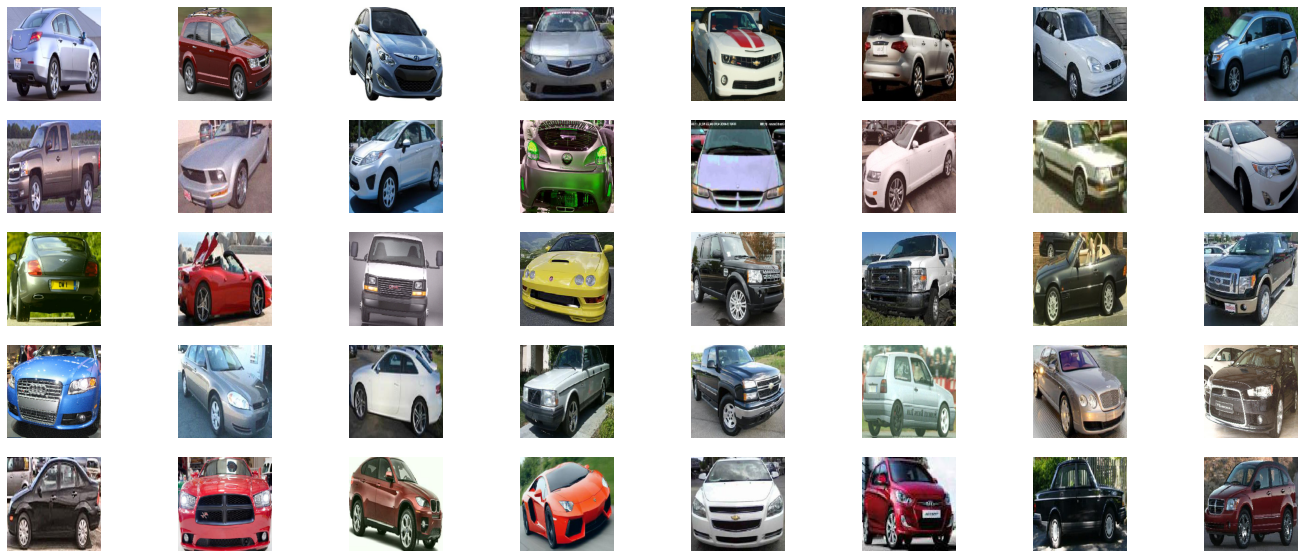

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_grid(images, ncols=None, cmap='gray'):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.axis('off')
            ax.imshow(img, cmap=cmap)

images = [train_gen[0][0][i] for i in range(40)]

# plot them
plot_image_grid(images)

In [3]:
logs1 = '''
Epoch 1/10
203/203 [==============================] - ETA: 0s - loss: 3.5021 - categorical_accuracy: 0.2372 - top_k_categorical_accuracy: 0.4001
Epoch 1: val_categorical_accuracy improved from -inf to 0.37312, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 326s 2s/step - loss: 3.5021 - categorical_accuracy: 0.2372 - top_k_categorical_accuracy: 0.4001 - val_loss: 2.6764 - val_categorical_accuracy: 0.3731 - val_top_k_categorical_accuracy: 0.5987 - lr: 1.0000e-04
Epoch 2/10
203/203 [==============================] - ETA: 0s - loss: 2.0269 - categorical_accuracy: 0.5607 - top_k_categorical_accuracy: 0.7665
Epoch 2: val_categorical_accuracy improved from 0.37312 to 0.59688, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 325s 2s/step - loss: 2.0269 - categorical_accuracy: 0.5607 - top_k_categorical_accuracy: 0.7665 - val_loss: 1.6813 - val_categorical_accuracy: 0.5969 - val_top_k_categorical_accuracy: 0.7844 - lr: 1.0000e-04
Epoch 3/10
203/203 [==============================] - ETA: 0s - loss: 1.0507 - categorical_accuracy: 0.8086 - top_k_categorical_accuracy: 0.9335
Epoch 3: val_categorical_accuracy improved from 0.59688 to 0.69187, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 324s 2s/step - loss: 1.0507 - categorical_accuracy: 0.8086 - top_k_categorical_accuracy: 0.9335 - val_loss: 1.1918 - val_categorical_accuracy: 0.6919 - val_top_k_categorical_accuracy: 0.8619 - lr: 1.0000e-04
Epoch 4/10
203/203 [==============================] - ETA: 0s - loss: 0.5501 - categorical_accuracy: 0.9197 - top_k_categorical_accuracy: 0.9823
Epoch 4: val_categorical_accuracy improved from 0.69187 to 0.75250, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 324s 2s/step - loss: 0.5501 - categorical_accuracy: 0.9197 - top_k_categorical_accuracy: 0.9823 - val_loss: 0.9656 - val_categorical_accuracy: 0.7525 - val_top_k_categorical_accuracy: 0.8969 - lr: 1.0000e-04
Epoch 5/10
203/203 [==============================] - ETA: 0s - loss: 0.2936 - categorical_accuracy: 0.9666 - top_k_categorical_accuracy: 0.9962
Epoch 5: val_categorical_accuracy improved from 0.75250 to 0.78000, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 326s 2s/step - loss: 0.2936 - categorical_accuracy: 0.9666 - top_k_categorical_accuracy: 0.9962 - val_loss: 0.8473 - val_categorical_accuracy: 0.7800 - val_top_k_categorical_accuracy: 0.9169 - lr: 1.0000e-04
Epoch 6/10
203/203 [==============================] - ETA: 0s - loss: 0.1569 - categorical_accuracy: 0.9870 - top_k_categorical_accuracy: 0.9992
Epoch 6: val_categorical_accuracy improved from 0.78000 to 0.79937, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 326s 2s/step - loss: 0.1569 - categorical_accuracy: 0.9870 - top_k_categorical_accuracy: 0.9992 - val_loss: 0.7564 - val_categorical_accuracy: 0.7994 - val_top_k_categorical_accuracy: 0.9269 - lr: 1.0000e-04
Epoch 7/10
203/203 [==============================] - ETA: 0s - loss: 0.1023 - categorical_accuracy: 0.9938 - top_k_categorical_accuracy: 0.9999
Epoch 7: val_categorical_accuracy improved from 0.79937 to 0.80375, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 325s 2s/step - loss: 0.1023 - categorical_accuracy: 0.9938 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.7505 - val_categorical_accuracy: 0.8037 - val_top_k_categorical_accuracy: 0.9275 - lr: 1.0000e-04
Epoch 8/10
203/203 [==============================] - ETA: 0s - loss: 0.0627 - categorical_accuracy: 0.9962 - top_k_categorical_accuracy: 1.0000
Epoch 8: val_categorical_accuracy improved from 0.80375 to 0.80437, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 325s 2s/step - loss: 0.0627 - categorical_accuracy: 0.9962 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7391 - val_categorical_accuracy: 0.8044 - val_top_k_categorical_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 9/10
203/203 [==============================] - ETA: 0s - loss: 0.0446 - categorical_accuracy: 0.9974 - top_k_categorical_accuracy: 1.0000
Epoch 9: val_categorical_accuracy improved from 0.80437 to 0.81625, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 326s 2s/step - loss: 0.0446 - categorical_accuracy: 0.9974 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7184 - val_categorical_accuracy: 0.8163 - val_top_k_categorical_accuracy: 0.9300 - lr: 1.0000e-04
Epoch 10/10
203/203 [==============================] - ETA: 0s - loss: 0.0364 - categorical_accuracy: 0.9980 - top_k_categorical_accuracy: 0.9999
Epoch 10: val_categorical_accuracy did not improve from 0.81625
203/203 [==============================] - 268s 1s/step - loss: 0.0364 - categorical_accuracy: 0.9980 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.7343 - val_categorical_accuracy: 0.8087 - val_top_k_categorical_accuracy: 0.9200 - lr: 1.0000e-04
<keras.callbacks.History at 0x7f6a67d03fd0>
'''
logs2 = '''
Epoch 1/7
203/203 [==============================] - ETA: 0s - loss: 0.0340 - categorical_accuracy: 0.9978 - top_k_categorical_accuracy: 1.0000
Epoch 1: val_categorical_accuracy improved from -inf to 0.81563, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 378s 2s/step - loss: 0.0340 - categorical_accuracy: 0.9978 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.7247 - val_categorical_accuracy: 0.8156 - val_top_k_categorical_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 2/7
203/203 [==============================] - ETA: 0s - loss: 0.0408 - categorical_accuracy: 0.9954 - top_k_categorical_accuracy: 0.9998
Epoch 2: val_categorical_accuracy did not improve from 0.81563
203/203 [==============================] - 281s 1s/step - loss: 0.0408 - categorical_accuracy: 0.9954 - top_k_categorical_accuracy: 0.9998 - val_loss: 0.7561 - val_categorical_accuracy: 0.8000 - val_top_k_categorical_accuracy: 0.9219 - lr: 1.0000e-04
Epoch 3/7
203/203 [==============================] - ETA: 0s - loss: 0.0328 - categorical_accuracy: 0.9962 - top_k_categorical_accuracy: 0.9999
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.

Epoch 3: val_categorical_accuracy did not improve from 0.81563
203/203 [==============================] - 282s 1s/step - loss: 0.0328 - categorical_accuracy: 0.9962 - top_k_categorical_accuracy: 0.9999 - val_loss: 0.7607 - val_categorical_accuracy: 0.8087 - val_top_k_categorical_accuracy: 0.9231 - lr: 1.0000e-04
Epoch 4/7
203/203 [==============================] - ETA: 0s - loss: 0.0177 - categorical_accuracy: 0.9985 - top_k_categorical_accuracy: 0.9998
Epoch 4: val_categorical_accuracy improved from 0.81563 to 0.82875, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 338s 2s/step - loss: 0.0177 - categorical_accuracy: 0.9985 - top_k_categorical_accuracy: 0.9998 - val_loss: 0.6983 - val_categorical_accuracy: 0.8288 - val_top_k_categorical_accuracy: 0.9350 - lr: 2.0000e-05
Epoch 5/7
203/203 [==============================] - ETA: 0s - loss: 0.0115 - categorical_accuracy: 0.9989 - top_k_categorical_accuracy: 1.0000
Epoch 5: val_categorical_accuracy improved from 0.82875 to 0.83312, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 338s 2s/step - loss: 0.0115 - categorical_accuracy: 0.9989 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6847 - val_categorical_accuracy: 0.8331 - val_top_k_categorical_accuracy: 0.9325 - lr: 2.0000e-05
Epoch 6/7
203/203 [==============================] - ETA: 0s - loss: 0.0104 - categorical_accuracy: 0.9988 - top_k_categorical_accuracy: 1.0000
Epoch 6: val_categorical_accuracy improved from 0.83312 to 0.83812, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 337s 2s/step - loss: 0.0104 - categorical_accuracy: 0.9988 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6829 - val_categorical_accuracy: 0.8381 - val_top_k_categorical_accuracy: 0.9350 - lr: 2.0000e-05
Epoch 7/7
203/203 [==============================] - ETA: 0s - loss: 0.0089 - categorical_accuracy: 0.9990 - top_k_categorical_accuracy: 1.0000
Epoch 7: val_categorical_accuracy improved from 0.83812 to 0.84062, saving model to /content/drive/Shareddrives/ML/ViT
WARNING:absl:Function `_wrapped_model` contains input name(s) vit-b32_input with unsupported characters which will be renamed to vit_b32_input in the SavedModel.
WARNING:absl:Found untraced functions such as MultiHeadDotProductAttention_1_layer_call_fn, MultiHeadDotProductAttention_1_layer_call_and_return_conditional_losses, LayerNorm_0_layer_call_fn, LayerNorm_0_layer_call_and_return_conditional_losses, LayerNorm_2_layer_call_fn while saving (showing 5 of 192). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/ML/ViT/assets
203/203 [==============================] - 338s 2s/step - loss: 0.0089 - categorical_accuracy: 0.9990 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.6483 - val_categorical_accuracy: 0.8406 - val_top_k_categorical_accuracy: 0.9344 - lr: 2.0000e-05
'''

In [5]:
logs = logs1 + ' ' + logs2

In [9]:
pieces = logs.replace('\n', ' ').split()

In [28]:
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []
for i in range(len(pieces)):
  if pieces[i] == 'loss:':
    value = float(pieces[i+1])
    train_loss.append(value)
  elif pieces[i] == 'val_loss:':
    value = float(pieces[i+1])
    val_loss.append(value)
  elif pieces[i] == 'categorical_accuracy:':
    value = float(pieces[i+1])
    train_accuracy.append(value)
  elif pieces[i] == 'val_categorical_accuracy:':
    value = float(pieces[i+1])
    val_accuracy.append(value)
len(train_loss)

34

In [29]:
train_loss = train_loss[1::2]
train_accuracy = train_accuracy[1::2]

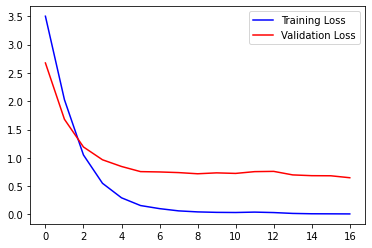

In [35]:
import matplotlib.pyplot as plt

plt.plot(train_loss, color='b', label='Training Loss')
plt.plot(val_loss, color='r', label='Validation Loss')
plt.legend()

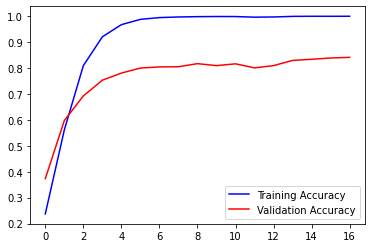

In [36]:
import matplotlib.pyplot as plt

plt.plot(train_accuracy, color='b', label='Training Accuracy')
plt.plot(val_accuracy, color='r', label='Validation Accuracy')
plt.legend()

In [ ]:
train_loss = [3.5021, 2.0269, 1.0507, 0.5501, 0.2936, 0.1569, 0.1023, 0.0627, 0.0446, 0.0364, 0.0340, 0.0408, 0.0328, ]